In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
import random

from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from datetime import datetime

D:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
D:\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("

In [2]:
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

### Load data from csv

In [22]:
# loading data king country as data
data = pd.read_csv('kc_house_data.csv')

In [18]:
##get RealEstate Data
df = pd.read_csv('RealEstate.csv')

In [19]:
#get Iwoa Data
df2 = pd.read_csv('train.csv')

In [21]:
#get California Data
df3 = pd.read_csv('California Housing.csv')

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [105]:
data.duplicated().describe()

count     21613
unique        1
top       False
freq      21613
dtype: object

### KC house data

Multiple Regressions

In [55]:
# loading data king country as data
data = pd.read_csv('kc_house_data.csv')

In [56]:
data=data.dropna(axis=0, how='any')

In [76]:
# Function plot_correlation_map for visualization 
def plot_correlation_map( df ):
    corr = df.corr()
    #set size of the figure
    map , ax = plt.subplots( figsize =( 20 , 20 ) )
    cmap = sns.diverging_palette( 20 , 10 , as_cmap = True )
    map = sns.heatmap(
        corr,
        cmap = cmap,
        square=True, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 8 }
    )

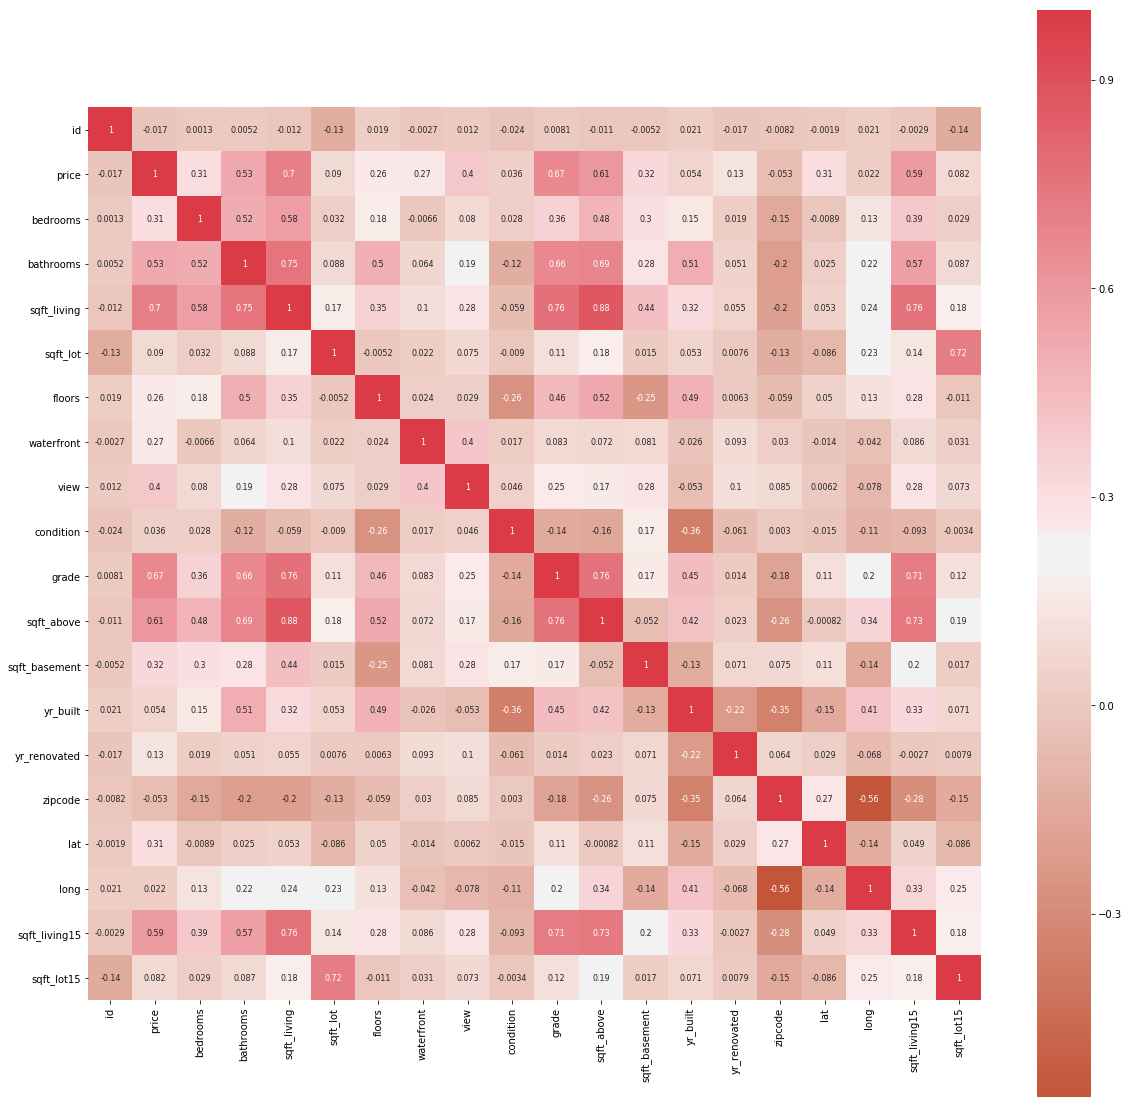

In [11]:
plot_correlation_map(data)

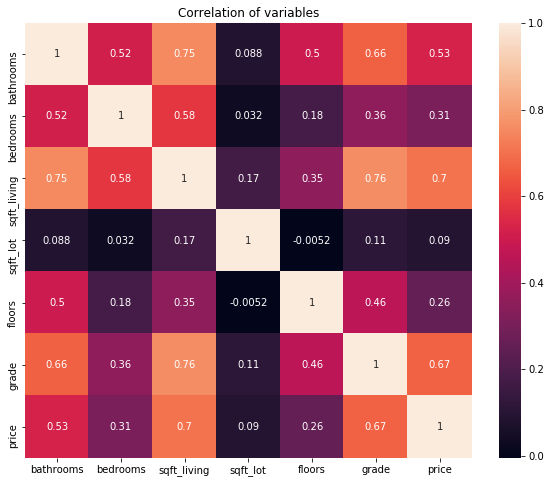

In [9]:
# choose key variables and show the corresponed heatmap
corr = data[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]
##set heatmapsize
plt.figure(figsize=(10,8))
##set title
plt.title('Correlation of variables')
##set max corr=1,add note in blank and data type is float
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [93]:
# Setup X, y
X = data[["bedrooms","bathrooms","sqft_living","grade"]]
y = data["price"]

In [94]:
# load state model with ordinary least squares model, fit with X, y
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.033e+04
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        13:15:17   Log-Likelihood:            -2.9964e+05
No. Observations:               21613   AIC:                         5.993e+05
Df Residuals:                   21609   BIC:                         5.993e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -7.365e+04   2073.607    -35.520      0.000   -7.77e+04   -6.96e+04
bathrooms   -1.708e+04   3548.852     -4.814      0.000    -2.4e+04   -1.01e+04
sqft_living   290.4100      3.046     95.340      0.000     284.439     296.380
grade         2.96e+04   1058.774     27.953      0.000    2.75e+04    3.17e+04
==============================================================================
Omnibus:                    15974.689   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           698243.000
Skew:                           3.104   Prob(JB):                         0.00
Kurtosis:                      30.144   Cond. No.                     4.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
##Get train set and test set
X_train,X_test, y_train, y_true= train_test_split(X, y, test_size=0.2) 

In [97]:
# Set up knn, linear regression, ridge, lasso, decision tree and svr model
knn = KNeighborsRegressor()
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
decision = DecisionTreeRegressor()
svr = SVR()

In [98]:
# fit our model with train data
knn.fit(X_train,y_train)
linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)
decision.fit(X_train,y_train)
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [99]:
# get prediction
y_pre_knn = knn.predict(X_test)
y_pre_linear = linear.predict(X_test)
y_pre_ridge = ridge.predict(X_test)
y_pre_lasso = lasso.predict(X_test)
y_pre_decision = decision.predict(X_test)
y_pre_svr = svr.predict(X_test)

In [100]:
# display score of our prediction
knn_score = r2_score(y_true,y_pre_knn)
linear_score=r2_score(y_true,y_pre_linear)
ridge_score=r2_score(y_true,y_pre_ridge)
lasso_score=r2_score(y_true,y_pre_lasso)
decision_score=r2_score(y_true,y_pre_decision)
svr_score=r2_score(y_true,y_pre_svr)
display(knn_score,linear_score,ridge_score,lasso_score,decision_score,svr_score)

0.54576687958254655

0.54686592248659349

0.54686517300066284

0.54686558064901614

0.40061761370171878

-0.060856692885338681

In [101]:
## cross validation 
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(linear, X, y, cv=15)
print(scores.mean())

0.540002056128


Deep Learning Regression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [4]:
# load dataset
dataframe = pd.read_csv('kc_house_Sample.csv')
dataframe=dataframe.dropna(axis=0, how='any')
# split into input (X) and output (Y) variables
X = dataframe[["bedrooms", "bathrooms","grade","sqft_living"]]
Y = dataframe["price"]

In [5]:
# define base model
def baseline_model():
    # create 3-layer model(more layer will make the model more accurate)
    model = Sequential()
    model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model(after test, cosine_proximity is the one fit our model most)
    model.compile(loss='cosine_proximity', optimizer='adam')
    return model

In [6]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [7]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) cosine_proximity" % (results.mean(), results.std()))

Results: -1.00 (0.00) cosine_proximity


In [8]:
# evaluate model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) cosine_proximity" % (results.mean(), results.std()))

Standardized: -0.80 (0.60) cosine_proximity


Random Forest

In [58]:
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [59]:
features = pd.get_dummies(X)

In [60]:
labels = data["price"]
features_list = list(features.columns)
features = np.array(features)
labels = np.array(labels)

In [61]:
# split train and test data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [62]:
train_features.shape

(16209, 4)

In [63]:
# Set up our randomforest with random_state = 42
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [64]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [65]:
# fit our randomforest model with features and labels
rf.fit(features, labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [66]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.9min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [67]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [68]:
best_random = rf_random.best_estimator_
best_random.fit(train_features, train_labels)
predictions = best_random.predict(test_features)

In [69]:
rf_random.best_score_

0.59539182246486422

In [70]:
best_random.score(test_features, test_labels)

0.59203265237850133

In [71]:
np.set_printoptions(threshold=np.inf)  
predictions

array([  521029.06732802,   648226.06792119,   961138.99730253,
        2092681.8198481 ,   657698.61863541,   410253.82184832,
         644812.550084  ,   365277.42133243,   442510.09606766,
         401957.73208531,   563692.09291574,   434818.59840311,
         415557.54758046,   374252.53738677,   282853.16339163,
        1426513.57159643,   424808.45860649,  1301954.86974751,
         383685.85380371,   473874.72736152,   431816.61341131,
        1701619.5728188 ,   696049.49702914,   666128.4277069 ,
         503406.80666475,   474466.7641537 ,   308335.76451688,
         237482.93513656,   528753.4764216 ,   378113.69116975,
         349745.84975232,   479892.53036881,   515763.32659459,
         361919.7280442 ,   345903.35434699,   769947.41799832,
        1019436.4664645 ,   523346.6509429 ,   334717.89552182,
        1519491.11892358,   442140.71211589,   272516.38169618,
         595704.09024907,   408935.99476451,   258399.57004917,
         274949.51315701,   352384.62198

### San Luis

Multiple Regressions

In [15]:
##get RealEstate Data
df = pd.read_csv('RealEstate.csv')

In [16]:
df = df.dropna(axis=0, how="any")

In [17]:
df.describe()

,MLS,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft
count,781.000000,7.810000e+02,781.000000,781.000000,781.000000,781.000000
mean,151224.550576,3.833291e+05,3.142125,2.355954,1755.058899,213.131293
std,3936.122042,3.490381e+05,0.855768,0.846596,819.577603,115.082146
min,132842.000000,2.650000e+04,0.000000,1.000000,120.000000,19.330000
25%,149922.000000,1.990000e+05,3.000000,2.000000,1218.000000,142.140000
50%,152581.000000,2.950000e+05,3.000000,2.000000,1550.000000,188.360000
75%,154167.000000,4.290000e+05,4.000000,3.000000,2032.000000,245.420000
max,154580.000000,5.499000e+06,10.000000,11.000000,6800.000000,1144.640000


In [77]:
# Function plot_correlation_map for visualization 
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 10 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 9 }
    )

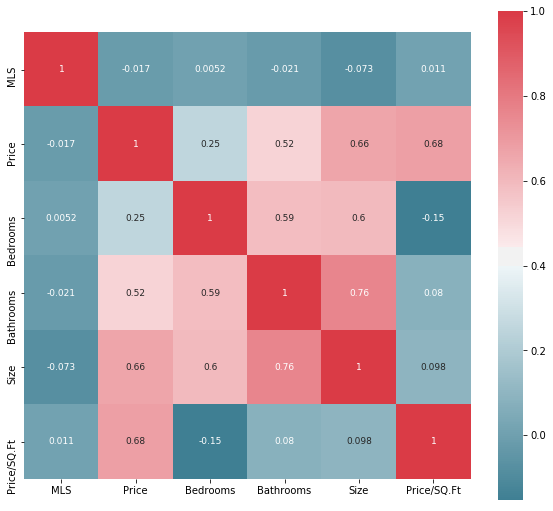

In [61]:
#showing correlation map
plot_correlation_map(df)

In [18]:
X = df[["Bathrooms","Size"]]
y = df["Price"]

In [19]:
X = X.dropna(axis=0, how="any")
y = y.dropna(axis=0, how="any")

In [22]:
##Get train set and test set
X_train,X_test, y_train, y_true= train_test_split(X, y, test_size=0.2) 

In [24]:
print (X_train.shape)  
print (y_train.shape)  
print (X_test.shape)  
print (y_true.shape ) 

(624, 2)
(624,)
(157, 2)
(157,)


In [109]:
# load state model with ordinary least squares model, fit with X, y
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     1112.
Date:                Tue, 24 Apr 2018   Prob (F-statistic):          5.92e-229
Time:                        10:56:31   Log-Likelihood:                -10858.
No. Observations:                 781   AIC:                         2.172e+04
Df Residuals:                     779   BIC:                         2.173e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bathrooms  -3.335e+04   1.38e+04     -2.419      0.016   -6.04e+04   -6285.522
Size         271.4282     17.817     15.235      0.000     236.454     306.403
==============================================================================
Omnibus:                     1060.953   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           320867.089
Skew:                           6.986   Prob(JB):                         0.00
Kurtosis:                     101.311   Cond. No.                     2.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
# Set up knn, linear regression, ridge, lasso, decision tree and svr model
knn = KNeighborsRegressor()
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
decision = DecisionTreeRegressor()
svr = SVR()

In [111]:
# fit our model with train data
knn.fit(X_train,y_train)
linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)
decision.fit(X_train,y_train)
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [112]:
# get prediction
y_pre_knn = knn.predict(X_test)
y_pre_linear = linear.predict(X_test)
y_pre_ridge = ridge.predict(X_test)
y_pre_lasso = lasso.predict(X_test)
y_pre_decision = decision.predict(X_test)
y_pre_svr = svr.predict(X_test)

In [113]:
# display score of our prediction
knn_score = r2_score(y_true,y_pre_knn)
linear_score=r2_score(y_true,y_pre_linear)
ridge_score=r2_score(y_true,y_pre_ridge)
lasso_score=r2_score(y_true,y_pre_lasso)
decision_score=r2_score(y_true,y_pre_decision)
svr_score=r2_score(y_true,y_pre_svr)
display(knn_score,linear_score,ridge_score,lasso_score,decision_score,svr_score)

0.36418773607724175

0.3303001946624462

0.3303660517683118

0.33030072154379664

0.13687551511782314

-0.040204972835398811

Deep Learning Regression

In [20]:
# load dataset
dataframe = pd.read_csv('RealEstate.csv')
# split into input (X) and output (Y) variables. X is the related factors and Y is the price
X = dataframe[["Bathrooms", "Size"]]
Y = dataframe["Price"]

In [21]:
# define base model
def baseline_model():
    # create 3-layer model(more layer will make the model more accurate)
    model = Sequential()
    model.add(Dense(2, input_dim=2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model(after test, cosine_proximity is the one fit our model most)
    model.compile(loss='cosine_proximity', optimizer='adam')
    return model

In [22]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [23]:
# set a 10-fold cross validation
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) cosine_proximity" % (results.mean(), results.std()))

Results: 0.20 (0.98) cosine_proximity


In [24]:
# evaluate model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) cosine_proximity" % (results.mean(), results.std()))

Standardized: 1.00 (0.00) cosine_proximity


Random Forest

In [26]:
# load our realestate data and check head data
features = pd.read_csv('RealEstate.csv')
features.head()

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000.0,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000.0,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000.0,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000.0,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900.0,3,1,1249,87.99,Short Sale


In [27]:
features = pd.get_dummies(features)

In [28]:
labels = features['Price']
features = features.drop('Price',axis = 1)
features_list = list(features.columns)
features = np.array(features)
labels = np.array(labels)

In [29]:
# split train and test data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [30]:
train_features.shape

(585, 62)

In [31]:
# Set up our randomforest with random_state = 42
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [32]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [33]:
# fit our randomforest model with features and labels
rf.fit(features, labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [35]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [36]:
best_random = rf_random.best_estimator_
best_random.fit(train_features, train_labels)
predictions = best_random.predict(test_features)

In [37]:
rf_random.best_score_

0.85982280712334858

In [38]:
best_random.score(test_features, test_labels)

0.9068982823824856

In [39]:
np.set_printoptions(threshold=np.inf)  
predictions

array([  266821.70845238,   206722.7046746 ,   509619.10735786,
         992665.30085498,   251271.91524603,   845880.35611111,
         193724.26258153,   221912.30738095,   208159.25595635,
         373784.70208153,   162860.82831746,  1288213.41135281,
         229399.00706349,   773694.52435426,   337076.97124603,
         468624.37898936,   294245.48937229,   198359.53014286,
         300811.47670635,   771720.28948413,   241604.64435992,
         149920.78419048,   262481.63735931,   163048.74719048,
         205026.17512698,   314703.19571111,   397122.43843254,
        1294621.60094877,   376060.36358586,   415220.98625   ,
         860280.82174603,   365462.20166667,   201673.84728571,
         362148.37162698,    62714.45428571,   208700.01090476,
         255517.36655198,   311988.08819444,   213365.35650794,
         226207.98283766,    79704.64834416,   498949.94309921,
         290504.89456349,  1020819.63851371,   818662.06452381,
         326398.40154762,   307550.72063

### Iowa Data

Multiple Regressions

In [130]:
df2 = pd.read_csv('train.csv')

In [131]:
df2=df2.dropna(axis=0, how='any')

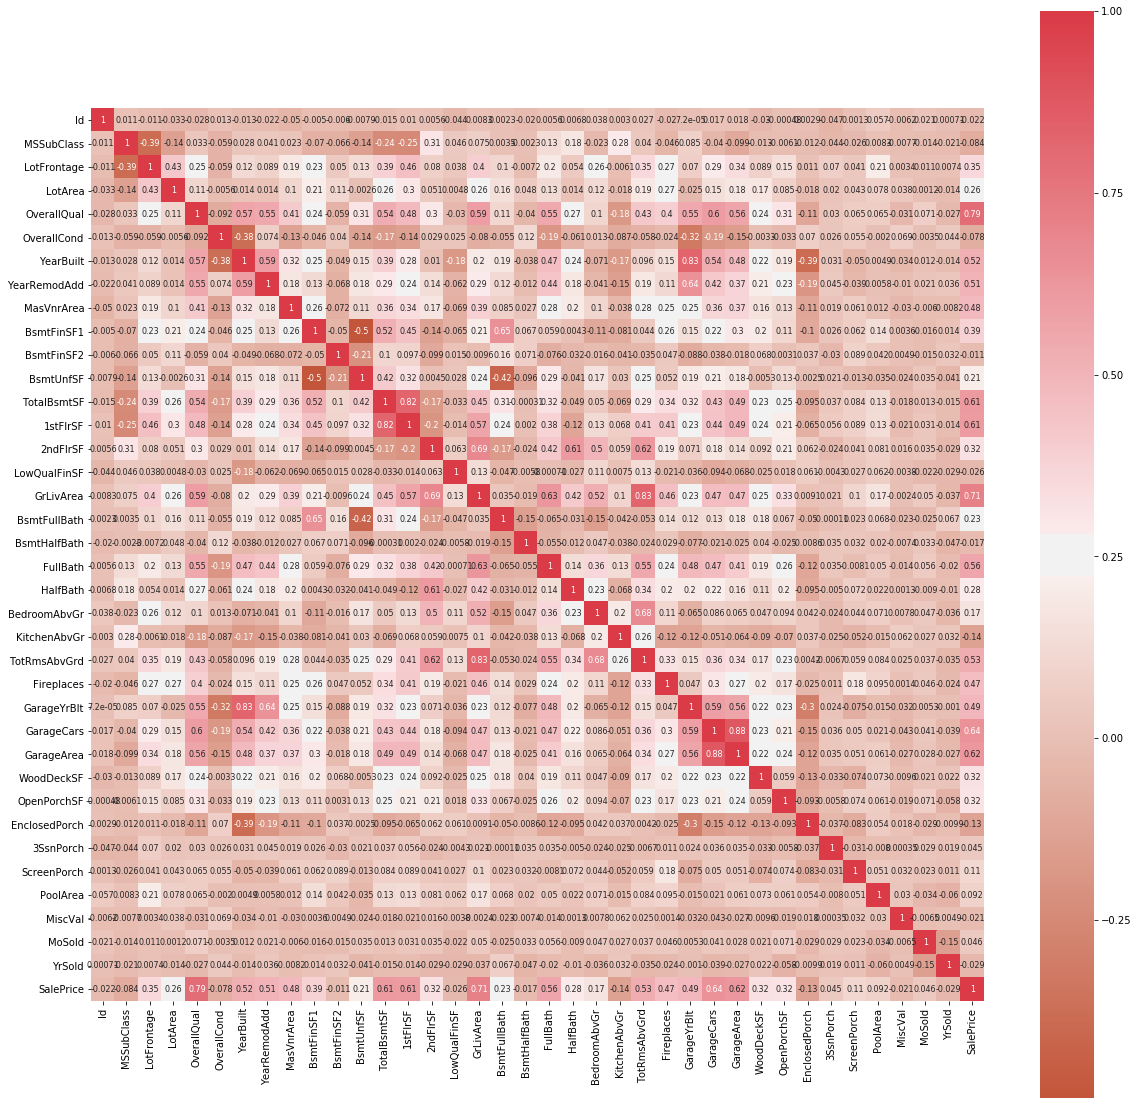

In [144]:
# display correlation map for df2
plot_correlation_map(df2)

In [132]:
#select relative variables
cotrain = df2[['SalePrice','OverallQual','FullBath','TotRmsAbvGrd','1stFlrSF','TotalBsmtSF','GarageCars','GarageYrBlt','BedroomAbvGr']]

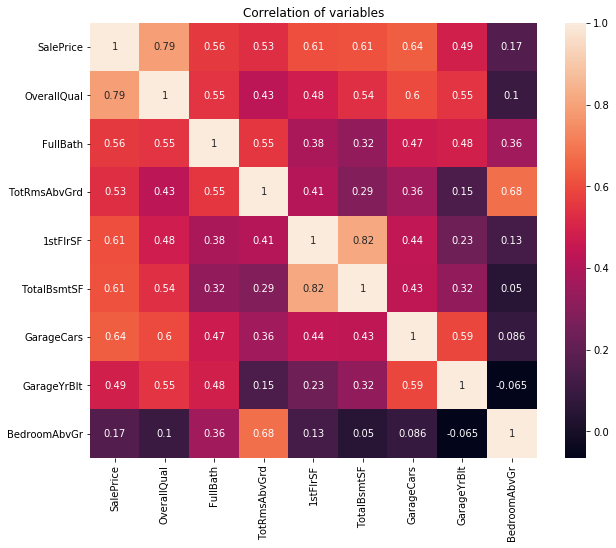

In [91]:
# display correlation map for cotrain
##set heatmapsize
plt.figure(figsize=(10,8))
##set title
plt.title('Correlation of variables')
##set max corr=1,add note in blank and data type is float
sns.heatmap(cotrain.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [129]:
X = df2[["OverallQual","FullBath","TotRmsAbvGrd","1stFlrSF","TotalBsmtSF","GarageCars"]]
y = df2["SalePrice"]

In [66]:
# load state model with ordinary least squares model, fit with X, y
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     3992.
Date:                Sat, 21 Apr 2018   Prob (F-statistic):               0.00
Time:                        20:36:15   Log-Likelihood:                -17786.
No. Observations:                1460   AIC:                         3.558e+04
Df Residuals:                    1454   BIC:                         3.562e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual   1.288e+04   1107.782     11.626      0.000    1.07e+04    1.51e+04
FullBath      1.254e+04   3009.461      4.166      0.000    6633.281    1.84e+04
TotRmsAbvGrd   214.3498    887.304      0.242      0.809   -1526.182    1954.882
1stFlrSF         2.7182      5.861      0.464      0.643      -8.778      14.215
TotalBsmtSF     38.3916      5.220      7.355      0.000      28.152      48.631
GarageCars    2.394e+04   2143.924     11.165      0.000    1.97e+04    2.81e+04
==============================================================================
Omnibus:                      840.945   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14330.458
Skew:                           2.326   Prob(JB):                         0.00
Kurtosis:                      17.626   Cond. No.                     4.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1) 

In [68]:
# Set up knn, linear regression, ridge, lasso, decision tree and svr model
knn = KNeighborsRegressor()
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
decision = DecisionTreeRegressor()
svr = SVR()

In [69]:
##Get train set and test set
X_train,X_test, y_train, y_true= train_test_split(X, y, test_size=0.2) 

In [70]:
# fit our model with train data
knn.fit(X_train,y_train)
linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)
decision.fit(X_train,y_train)
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [71]:
# get prediction
y_pre_knn = knn.predict(X_test)
y_pre_linear = linear.predict(X_test)
y_pre_ridge = ridge.predict(X_test)
y_pre_lasso = lasso.predict(X_test)
y_pre_decision = decision.predict(X_test)
y_pre_svr = svr.predict(X_test)

In [72]:
# display score of our prediction
knn_score = r2_score(y_true,y_pre_knn)
linear_score=r2_score(y_true,y_pre_linear)
ridge_score=r2_score(y_true,y_pre_ridge)
lasso_score=r2_score(y_true,y_pre_lasso)
decision_score=r2_score(y_true,y_pre_decision)
svr_score=r2_score(y_true,y_pre_svr)
display(knn_score,linear_score,ridge_score,lasso_score,decision_score,svr_score)

0.50942073481490024

0.77433125017984505

0.7743510336991104

0.77433282029652739

0.74303244367013166

-0.057514277470812392

Deep Learning Regression

In [68]:
# define base model
def baseline_model():
    # create 3-layer model
    model = Sequential()
    model.add(Dense(6, input_dim=6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='cosine_proximity', optimizer='adam')
    return model

In [70]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [72]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) cosine_proximity" % (results.mean(), results.std()))

Results: 0.79 (0.60) cosine_proximity


In [74]:
# evaluate model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f (%.2f) cosine_proximity" % (results.mean(), results.std()))

Standardized: 1.00 (0.00) cosine_proximity


Random Forest

In [40]:
features = pd.read_csv('train.csv')
features.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
# drop unclear data columns
#df = features.columns.drop("id").drop("date").drop("sqft_lot").drop("floors").drop("waterfront").drop("view")
d = features[["SalePrice","OverallQual","FullBath","TotRmsAbvGrd","1stFlrSF","TotalBsmtSF","GarageCars"]]

In [42]:
d = pd.get_dummies(d)

In [43]:
labels = d['SalePrice']
features = d.drop('SalePrice',axis = 1)
features_list = list(features.columns)
features = np.array(features)
labels = np.array(labels)

In [44]:
# split train and test data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [45]:
train_features.shape

(1095, 6)

In [46]:
# Set up our randomforest with random_state = 42
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [47]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [48]:
# fit our randomforest model with features and labels
rf.fit(features, labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [49]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [50]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [51]:
best_random = rf_random.best_estimator_
best_random.fit(train_features, train_labels)
predictions = best_random.predict(test_features)

In [52]:
rf_random.best_score_

0.79957995463066178

In [53]:
best_random.score(test_features, test_labels)

0.86964491847221048

In [54]:
np.set_printoptions(threshold=np.inf)  
predictions

array([ 134624.        ,  290803.11      ,  143097.25      ,
        203215.66666667,  304658.82      ,   78808.        ,
        176590.9       ,  153050.        ,   78808.        ,
        131864.642     ,  182570.        ,  113524.82065476,
        122154.79166667,  221078.66      ,  196347.6       ,
        126826.5       ,  211886.5       ,  130553.66666667,
        126640.        ,  214271.61      ,  168650.47333333,
        191829.68333333,  174377.70154762,  130322.        ,
        204782.62      ,  168061.        ,  190876.54      ,
         99194.86309524,  213632.5       ,  195684.16666667,
        124227.475     ,  237341.        ,  186413.66      ,
        114259.        ,  289571.28      ,  138152.        ,
        135071.75      ,  205479.35      ,  331766.35      ,
        102136.        ,  140621.        ,  204540.2       ,
        118948.        ,  366357.77      ,  145126.07142857,
        171809.        ,  119925.91666667,  111716.        ,
        427392.7       ,

### California data

Multiple Regressions

In [73]:
df3 = pd.read_csv('housing.csv')

In [74]:
df3.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


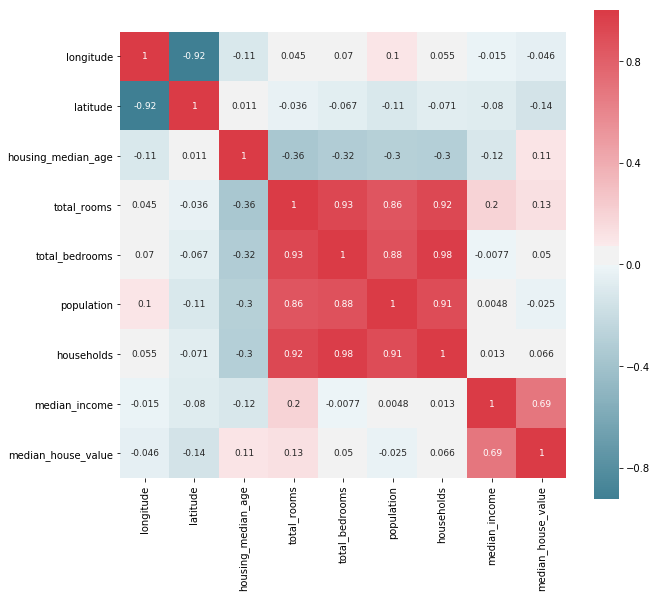

In [78]:
plot_correlation_map(df3)

In [79]:
dfm=df3.dropna(axis=0, how='any')

In [77]:
X = dfm[["housing_median_age","total_rooms","total_bedrooms","population","median_income","households"]]
y = dfm["median_house_value"]

In [97]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 3.470e+04
Date:                Fri, 20 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:46:12   Log-Likelihood:            -2.5886e+05
No. Observations:               20433   AIC:                         5.177e+05
Df Residuals:                   20428   BIC:                         5.178e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
housing_median_age  1271.3080     31.999     39.730      0.000    1208.588    1334.028
total_rooms          -12.2091      0.723    -16.892      0.000     -13.626     -10.792
population           -41.5636      1.138    -36.522      0.000     -43.794     -39.333
median_income       4.276e+04    262.473    162.895      0.000    4.22e+04    4.33e+04
households           197.5198      4.567     43.247      0.000     188.568     206.472
==============================================================================
Omnibus:                     4524.173   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13542.716
Skew:                           1.149   Prob(JB):                         0.00
Kurtosis:                       6.260   Cond. No.                     1.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [82]:
knn = KNeighborsRegressor()
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
decision = DecisionTreeRegressor()
svr = SVR()

In [83]:
##Get train set and test set
X_train,X_test, y_train, y_true= train_test_split(X, y, test_size=0.7) 

In [84]:
# fit our model with train data
knn.fit(X_train,y_train)
model3=linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)
decision.fit(X_train,y_train)
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [85]:
# get prediction
y_pre_knn = knn.predict(X_test)
y_pre_linear = linear.predict(X_test)
y_pre_ridge = ridge.predict(X_test)
y_pre_lasso = lasso.predict(X_test)
y_pre_decision = decision.predict(X_test)
y_pre_svr = svr.predict(X_test)

In [86]:
# display score of our prediction
knn_score = r2_score(y_true,y_pre_knn)
linear_score=r2_score(y_true,y_pre_linear)
ridge_score=r2_score(y_true,y_pre_ridge)
lasso_score=r2_score(y_true,y_pre_lasso)
decision_score=r2_score(y_true,y_pre_decision)
svr_score=r2_score(y_true,y_pre_svr)
display(knn_score,linear_score,ridge_score,lasso_score,decision_score,svr_score)

0.22128158368439221

0.56608494731409054

0.56608553671455408

0.56608503251820497

0.30647664674584996

-0.064512128605054508

Deep Learning Regression

In [9]:
# load dataset
dataframe = pd.read_csv('California Housing Sample.csv')
# split into input (X) and output (Y) variables
X = dataframe[["housing_median_age","total_rooms","total_bedrooms","population","median_income","households"]]
Y = dataframe["median_house_value"]

In [10]:
# define base model
def baseline_model():
    # create 3-layer model
    model = Sequential()
    model.add(Dense(6, input_dim=6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='cosine_proximity', optimizer='adam')
    return model

In [11]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [12]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) cosine_proximity" % (results.mean(), results.std()))

Results: nan (nan) cosine_proximity


In [ ]:
# evaluate model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) cosine_proximity" % (results.mean(), results.std()))

Random Forest

In [80]:
X = dfm[["housing_median_age","total_rooms","total_bedrooms","population","median_income","households"]]
y = dfm["median_house_value"]

In [81]:
labels = y
features = X
features_list = list(features.columns)
features = np.array(features)
labels = np.array(labels)

In [82]:
# split train and test data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [83]:
train_features.shape

(15324, 6)

In [84]:
# Set up our randomforest with random_state = 42
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [85]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 43, 76, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 400, 700, 1000]}


In [86]:
# fit our randomforest model with features and labels
rf.fit(features, labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [87]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 2, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.3min finished


RandomizedSearchCV(cv=2, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=2, n_jobs=-1,
          param_distributions={'n_estimators': [100, 400, 700, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 43, 76, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [88]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 43,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 700}

In [89]:
best_random = rf_random.best_estimator_
best_random.fit(train_features, train_labels)
predictions = best_random.predict(test_features)

In [90]:
rf_random.best_score_

0.6553820511218923

In [91]:
best_random.score(test_features, test_labels)

0.67503721454849819

In [92]:
np.set_printoptions(threshold=np.inf)  
predictions

array([ 204235.23394894,  156084.85057838,  192357.11545841,
        104672.26382935,  197807.19515065,  109372.1974972 ,
        247802.03045189,  231279.7785019 ,  423219.13077314,
         87681.93829053,  132566.22981191,  146391.9002505 ,
        215638.34048041,  178827.00046762,   98244.78120431,
        181764.69650393,  186008.54882992,  287639.35798093,
        143711.15762606,  284104.54918646,  185816.33949087,
        181608.11762778,  185341.57040157,  120941.97335467,
        168295.39388932,  194917.01133767,  237228.69696154,
        207205.85474131,  279578.07250953,  112741.3464036 ,
        196963.15875335,  202901.0938471 ,  167794.50807045,
        177004.78010494,  255091.15778169,  483847.38023439,
        499591.47790568,   79320.81211865,  110580.57296233,
        278684.16790783,  200460.89306036,   74869.49154057,
        176984.47422986,  114526.1641392 ,  103838.94854124,
        149793.11155392,  191428.60794488,  361484.48085337,
        208766.11769548,

Copyright <2018> <Xiangyu Chen, Sike Dong,Fanyu Mou>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

This work is licensed under the Creative Commons Attribution 3.0 United States License. To view a copy of this license, visit http://creativecommons.org/licenses/by/3.0/us/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.